In [1]:
# This script compares performance against the market index. 
# Updated by: Kuo L. 2022-05-02

import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Using pands-datareader module to connect to  yahoo finance api 
# to get close price for each ticker stock/ETF.
# for Market Index: NASDAQ Composite (^IXIC), 
#                   S&P 500 (^GSPC), 
#                   Dow Jones Industrial Average (^DJI)
#                   Russell 2000 (^RUT)

market_inx = '^GSPC' # ^GSPC for S&P 500
assets = [market_inx, 'AAPL','AMZN','GOOGL', 'DVN']
start_date = '2020-1-1'
pf_data = pd.DataFrame()

for a in assets:
    #you can chagne the start date to any date in 'yyyy-mm-dd' format.
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = start_date)['Adj Close'] 

In [3]:
pf_data.head() #makre sure companies were public at starting date

,^GSPC,AAPL,AMZN,GOOGL,DVN
Date,,,,,
2020-01-02,3257.850098,73.785919,94.900497,1368.680054,22.118767
2020-01-03,3234.850098,73.068573,93.748497,1361.520020,22.384640
2020-01-06,3246.280029,73.650787,95.143997,1397.810059,22.650507
2020-01-07,3237.179932,73.304413,95.343002,1395.109985,22.719122
2020-01-08,3253.050049,74.483612,94.598503,1405.040039,21.912931


In [4]:
pf_data.tail() #check companies still open and public at ending date

,^GSPC,AAPL,AMZN,GOOGL,DVN
Date,,,,,
2022-07-05,3831.389893,141.559998,113.500000,2265.260010,51.889999
2022-07-06,3845.080078,142.919998,114.330002,2291.439941,51.000000
2022-07-07,3902.620117,146.350006,116.330002,2375.659912,53.669998
2022-07-08,3899.379883,147.039993,115.540001,2387.070068,54.480000
2022-07-11,3862.149902,145.510101,112.805000,2326.330078,53.160000


<AxesSubplot:xlabel='Date'>

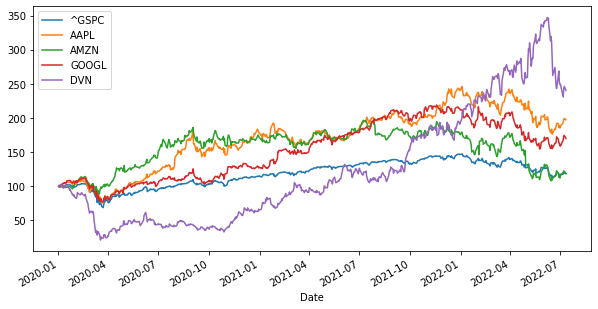

In [5]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10, 5)) #Plot of company performance without considering dividends

In [6]:
log_returns = np.log(pf_data / pf_data.shift(1)) #get average daily log returns

In [7]:
log_returns.mean() * 250 #get yearly returns(daily return x # of days a year). Market open roughly 250 days a year, so I do not use 365. 

^GSPC    0.067096
AAPL     0.267775
AMZN     0.068151
GOOGL    0.209166
DVN      0.345773
dtype: float64

In [8]:
log_returns.cov() * 250 #get coveriance between each pair.

,^GSPC,AAPL,AMZN,GOOGL,DVN
^GSPC,0.066918,0.078407,0.061011,0.070609,0.103220
AAPL,0.078407,0.136624,0.091392,0.089712,0.090023
AMZN,0.061011,0.091392,0.139312,0.083001,0.053090
GOOGL,0.070609,0.089712,0.083001,0.111849,0.096894
DVN,0.103220,0.090023,0.053090,0.096894,0.563623


In [9]:
log_returns.corr() #get correlation between each pair.

,^GSPC,AAPL,AMZN,GOOGL,DVN
^GSPC,1.000000,0.820013,0.631889,0.816156,0.531491
AAPL,0.820013,1.000000,0.662444,0.725726,0.324411
AMZN,0.631889,0.662444,1.000000,0.664928,0.189462
GOOGL,0.816156,0.725726,0.664928,1.000000,0.385908
DVN,0.531491,0.324411,0.189462,0.385908,1.000000


***